In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.fft import fft
import mne
import os


In [2]:
# Load the EEG data
inDir = r'D:\Imputed_file'    # EEG data folder
miscDir = r'D:\Code\Misc'     # Misc folder (if necessary)

fs = 125
secStart = 15
epochLenSec = 4 * 60   
epochLenSamp = fs * epochLenSec


In [3]:
def median_dc_correct_all_trials(data):
    """Remove the median from each trial (DC correction)."""
    return data - np.median(data, axis=1, keepdims=True)


In [6]:
# Initialize list to store trial mean data
trialMeanData = []

# Load all the data frames and take per-song mean across participants
# for i in range(1, 11):
#     currFn = f'song{i + 20}_Imputed.mat'
#     print(f'Loading {currFn}...')
#     data = sio.loadmat(os.path.join(inDir, currFn))
#     tempX_0 = data[f'data{i + 20}']
    
#     # Assuming a custom function medianDCCorrectAllTrialsInStruct exists
#     tempX_dc = median_dc_correct_all_trials(tempX_0)
#     tempX_epoch = tempX_dc[:, secStart * fs:(secStart * fs + epochLenSamp), :]
    
#     # Take mean of data across trials
#     trialMeanData.append(np.mean(tempX_epoch, axis=2))
    
    
currFn = f'song{21}_Imputed.mat'
print(f'Loading {currFn}...')
data = sio.loadmat(os.path.join(inDir, currFn))
tempX_0 = data[f'data{21}']

# Assuming a custom function medianDCCorrectAllTrialsInStruct exists
tempX_dc = median_dc_correct_all_trials(tempX_0)
tempX_epoch = tempX_dc[:, secStart * fs:(secStart * fs + epochLenSamp), :]

# Take mean of data across trials
trialMeanData.append(np.mean(tempX_epoch, axis=2))  
  
trialMeanData = np.array(trialMeanData)
print(trialMeanData)


Loading song21_Imputed.mat...
[[[ 1.86246126  1.32632645  1.80387841 ...  1.2509098   0.77347908
    0.1482524 ]
  [ 0.0073413  -0.55640544 -0.39116647 ...  2.69987414  2.3523147
    1.03643453]
  [ 0.93512362 -0.30863298  0.4769239  ...  0.84043593  1.26177845
    0.76939721]
  ...
  [-0.23635472 -1.36882715  0.01575834 ...  1.96483273  1.68550672
    1.49518545]
  [ 0.66865871 -0.47026509  0.19492821 ...  0.85384286  0.6634737
    1.13354355]
  [ 0.25809638  0.51742347  0.57055074 ... -1.8512221  -0.66751084
   -0.08248304]]]


In [7]:
# Load the tempos
tempo_data = sio.loadmat(os.path.join(miscDir, 'tempoHz.mat'))
tempoHz = tempo_data['tempoHz'].flatten()

# Creating a tempo matrix
tempoMatrix = np.tile(tempoHz, (6, 1)) * np.tile(2.0 ** np.arange(-2, 4).reshape(-1, 1), (1, 10))

# Get the number of channels, time points, and songs
nChan, T, nSongs = trialMeanData.shape
xax = np.arange(T) / (T / fs)  # x-axis for plotting
xl = [0, 15]  # xlim for plotting


In [8]:
# Analysis 1: Uniform spatial filter (mean of all channels)
channelMeansPerSong = np.mean(trialMeanData, axis=0)  

# Analysis 2: PCA
concatTrialMeans = np.concatenate([trialMeanData[:, :, i] for i in range(nSongs)], axis=1)

# Perform SVD (like PCA)
U, S, Vt = np.linalg.svd(concatTrialMeans, full_matrices=False)
concatPC1 = np.dot(U.T[0], concatTrialMeans)  # First PC (PC1)
PC1 = concatPC1.reshape(-1, 10)


In [9]:
# Compute FFT for each
CH = np.abs(fft(channelMeansPerSong, axis=0))
PC1_fft = np.abs(fft(PC1, axis=0))


Loading D:\Imputed_file\song21_Imputed.mat...


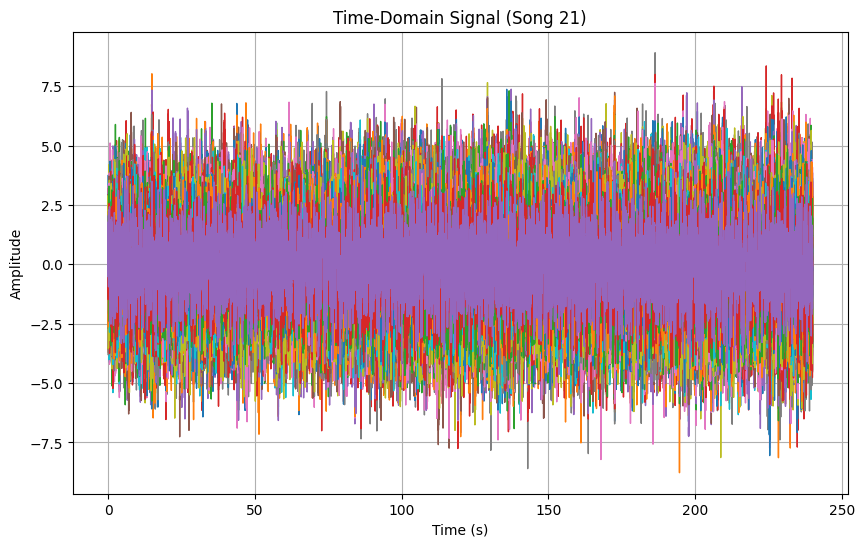

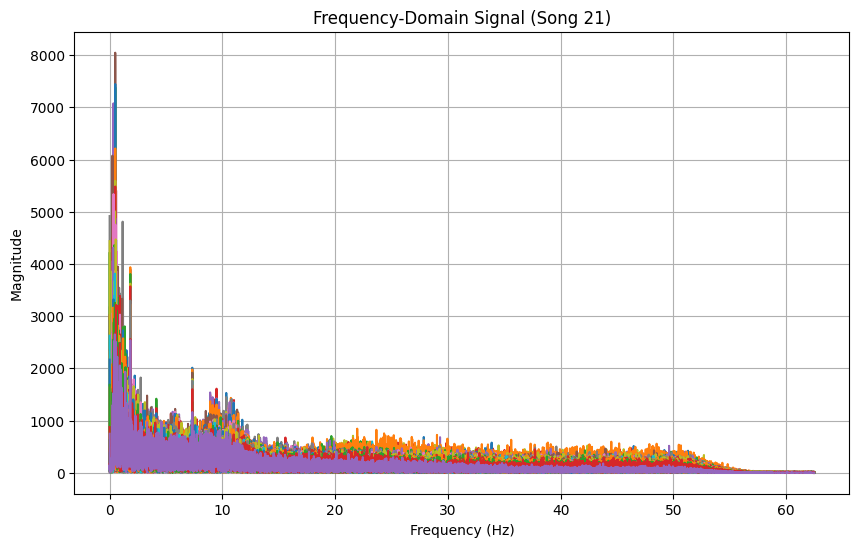

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.io import loadmat

# Helper function for DC correction (replace this with actual logic if needed)
def median_dccorrect_all_trials(data):
    return data - np.median(data, axis=1, keepdims=True)

# Visualization function for time-domain signal
def plot_time_domain(data, fs, song_idx=1):
    T = data.shape[1]
    time_axis = np.arange(0, T) / fs
    plt.figure(figsize=(10, 6))
    plt.plot(time_axis, np.mean(data, axis=2).T, linewidth=1)
    plt.title(f'Time-Domain Signal (Song {song_idx})')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

# Visualization function for frequency-domain signal (FFT)
def plot_frequency_domain(data, fs, song_idx=1):
    T = data.shape[1]
    freq_axis = np.fft.fftfreq(T, d=1/fs)[:T // 2]
    fft_data = np.abs(fft(np.mean(data, axis=2), axis=1))[:, :T // 2]
    
    plt.figure(figsize=(10, 6))
    plt.plot(freq_axis, fft_data.T)
    plt.title(f'Frequency-Domain Signal (Song {song_idx})')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.show()

# Load the first song's data (song 21 in your case)
in_dir = r'D:\Imputed_file'  # Adjust the path as needed
fs = 125  # Sampling frequency (Hz)
sec_start = 15  # Start of the epoch in seconds
epoch_len_sec = 4 * 60  # Length of the epoch (4 minutes)
epoch_len_samp = fs * epoch_len_sec  # Number of samples in the epoch

# Load the first song's data
song_idx = 21
curr_fn = os.path.join(in_dir, f'song{song_idx}_Imputed.mat')
print(f'Loading {curr_fn}...')
mat_data = loadmat(curr_fn)

# Extract the EEG data for the first song (data key will be 'data21')
data_key = f'data{song_idx}'
tempX_0 = mat_data[data_key]

# Apply DC correction and extract the epoch
tempX_dc = median_dccorrect_all_trials(tempX_0)
tempX_epoch = tempX_dc[:, sec_start * fs:(sec_start * fs + epoch_len_samp), :]

# Visualize the time-domain signal
plot_time_domain(tempX_epoch, fs, song_idx=song_idx)

# Visualize the frequency-domain signal (FFT)
plot_frequency_domain(tempX_epoch, fs, song_idx=song_idx)
